In [ ]:
raw_data_root = './data/raw/Train/powder_uncover'

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os
from os.path import join
import json
class_names = ['powder_uncover', 'powder_uneven', 'scratch']
data_root = './data/raw'
new_data_root = './data/yolov5'
data_split = 'Train'
split_folder = join(data_root, data_split)
new_split_folder = join(new_data_root, data_split)
name_idx = 0
for cls_idx, cls_name in enumerate(class_names):
    img_folder = join(split_folder, cls_name, 'image')
    mask_folder = join(split_folder, cls_name, 'mask')
    label_folder = join(split_folder, cls_name, 'label')
    for img_name in os.listdir(img_folder):
        raw_name = img_name.split('.')[0]
        rgb_im = cv2.imread(join(img_folder, img_name))
        mask_im = cv2.imread(join(mask_folder, img_name))
        labels = json.loads(open(join(label_folder, f'{raw_name}.json')).read())
        rects = [label['points'] for label in labels['shapes']]
        break
    break
import numpy as np
def gen_color(idx):
    cv2.applyColorMap(np.array([0], dtype=np.uint8), cv2.COLORMAP_HSV)

for c_i, rect in enumerate(rects):
    c_i = int((255 // len(rects)) * c_i)
    color = cv2.applyColorMap(np.array([c_i], dtype=np.uint8), cv2.COLORMAP_HSV).flatten()
    color = tuple([int(c) for c in color])
    image = cv2.rectangle(rgb_im, np.array(rect[0], dtype=int), np.array(rect[1], dtype=int), color, thickness=5)
# Displaying the image 
cv2.imshow('bbox',image) 

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
from os.path import join
import json
import numpy as np
import math
from tqdm import tqdm
class_names = ['powder_uncover', 'powder_uneven', 'scratch']
data_root = './data/raw'
new_data_root = './data/background'
data_split = 'Train'


name_idx = 0
for data_split in ['Train', 'Val']:
    split_folder = join(data_root, data_split)
    new_split_folder = join(new_data_root, data_split)
    for cls_idx, cls_name in enumerate(class_names):
        img_folder = join(split_folder, cls_name, 'image')
        mask_folder = join(split_folder, cls_name, 'mask')
        label_folder = join(split_folder, cls_name, 'label')
        new_img_folder = join(new_split_folder, 'images')
        os.makedirs(new_img_folder, exist_ok=True)
        for i, img_name in enumerate(tqdm(os.listdir(img_folder))):
            raw_name = img_name.split('.')[0]
            rgb_im = cv2.imread(join(img_folder, img_name))
            mask_im = cv2.imread(join(mask_folder, img_name))
            h, w, c = rgb_im.shape
            labels = json.loads(open(join(label_folder, f'{raw_name}.json')).read())
            rects = np.array([label['points'] for label in labels['shapes']]).astype(int)
            
            x_coord = rects[..., 0]
            y_coord = rects[..., 1]
            max_x, max_y = np.max(x_coord), np.max(y_coord)
            min_x, min_y = np.min(x_coord), np.min(y_coord)

            # (left, right, top, bottom)
            block_range = [(0, min_x, h), (max_x, w, h), (0, min_y, w), (max_y, h, w)] #(min, max, Height or width)
            areas = [(r[1] - r[0]) * r[2] for r in block_range]
            target_idx = np.argmax(areas)
            target_block = block_range[target_idx][:2]

            # left or right
            if target_idx <= 1:
                min_x, max_x = target_block
                block = rgb_im[:,min_x: max_x, :]
                width = max_x - min_x
                if width <= 1:
                    break
                new_img = np.repeat(block, math.ceil(w / width), axis=1)
                new_img = new_img[:,:w,:]
            else:
                min_y, max_y = target_block
                block = rgb_im[min_y: max_y, ...]
                height = max_y - min_y
                new_img = np.repeat(block, math.ceil(h / height), axis=0)
                new_img = new_img[:h,:,:]
            cv2.imwrite(join(new_img_folder, f'{name_idx}.png'), new_img)
            name_idx += 1

100%|██████████| 50/50 [00:04<00:00, 10.11it/s]


In [67]:
target_idx

1

In [76]:

    # # From left to right
    # start_idx = 0
    # end_idx = interval
    # while True:
    #     end_idx = min(end_idx + interval, h)
    #     start_idx += interval
    #     width = end_idx - start_idx
    #     new_img[:, start_idx : end_idx, :] = block[:, start_idx: start_idx + width, :]

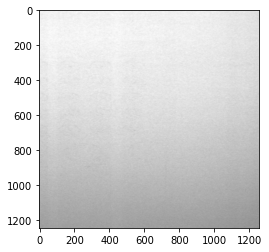